In [1]:
import xarray
import fsspec
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import numpy as np
from data_utils import *
from scipy.interpolate import griddata

Loading data summary (~ 20 s)

In [2]:
era5 = xarray.open_zarr(
    "gs://gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2",
    chunks={'time': 48},
    consolidated=True,
)
era5

<xarray.Dataset>
Dimensions:                                           (time: 552264,
                                                       latitude: 721,
                                                       longitude: 1440,
                                                       level: 37)
Coordinates:
  * latitude                                          (latitude) float32 90.0...
  * level                                             (level) int64 1 2 ... 1000
  * longitude                                         (longitude) float32 0.0...
  * time                                              (time) datetime64[ns] 1...
Data variables: (12/31)
    10m_u_component_of_wind                           (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind                           (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    2m_temperature                                    (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    angle_of_sub_gridscale_orography                  (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    anisotropy_of_sub_gridscale_orography             (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    geopotential                                      (time, level, latitude, longitude) float32 dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    ...                                                ...
    total_precipitation                               (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    type_of_high_vegetation                           (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    type_of_low_vegetation                            (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    u_component_of_wind                               (time, level, latitude, longitude) float32 dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    v_component_of_wind                               (time, level, latitude, longitude) float32 dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    vertical_velocity                                 (time, level, latitude, longitude) float32 dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>

Plot Temperature over entire earth

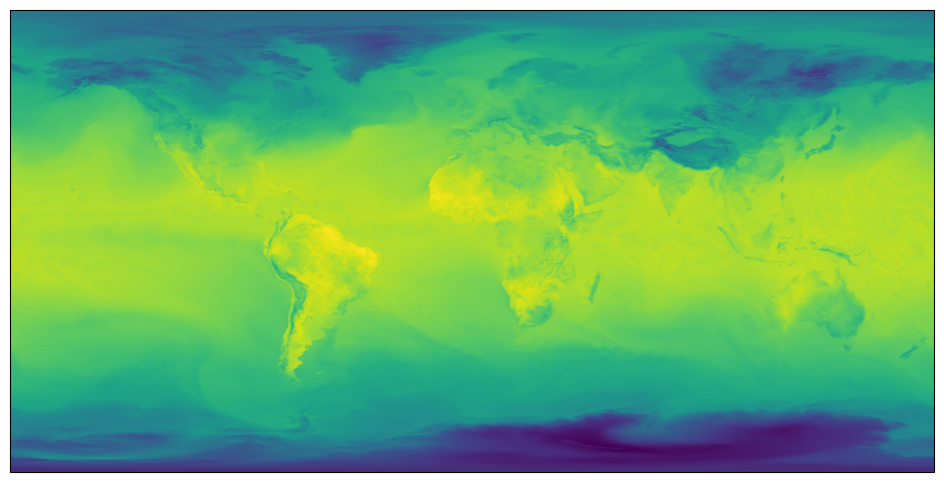

In [3]:
# Plot temperature at specific day and time
z = era5["2m_temperature"].sel(time='2020-10-31T18')

lon_flat, lat_flat, values = data_array_to_mesh_and_values(z)

plt.figure(figsize=(12, 6))
plt.axes(projection=ccrs.PlateCarree())
plt.scatter(
    lon_flat,
    lat_flat,
    c=values,
    s=1
)

Filter DataSet to the Netherlands

In [4]:
# Select time of dataset
ds_2020 = era5.sel(time=slice('2020-01-01', '2021-01-01'))

# Select region of containing the Netherlands
nl_ds = select_nl(ds_2020)

Plot Temperature observations on one specific day

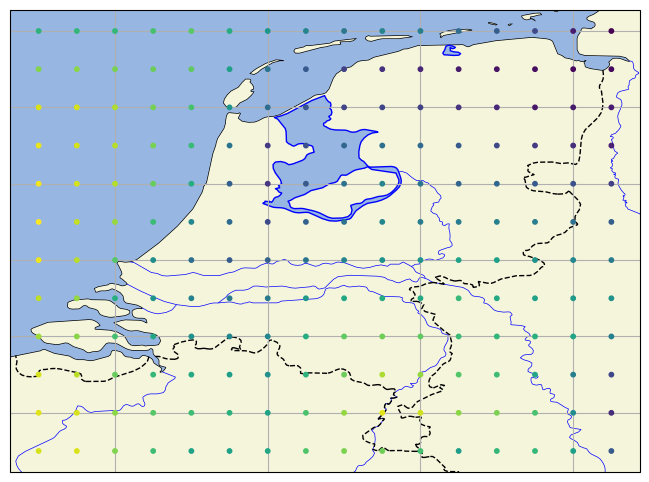

In [5]:
lon_flat, lat_flat, temperatures = data_array_to_mesh_and_values(nl_ds["2m_temperature"].sel(time='2020-10-31T18'))

ax = get_cartopy_ax()

ax.scatter(
    lon_flat,
    lat_flat,
    c=temperatures,
    s=10,
    zorder=10
)

plt.show()

Interpolation Methods

In [6]:
grid_x, grid_y = np.meshgrid(np.linspace(lon_flat.min(), lon_flat.max(), 100),
                             np.linspace(lat_flat.min(), lat_flat.max(), 100), indexing='ij')

grid_nearest = griddata(list(zip(lon_flat, lat_flat)), temperatures, (grid_x, grid_y), method = "nearest")
grid_linear = griddata(list(zip(lon_flat, lat_flat)), temperatures, (grid_x, grid_y), method = "linear")
grid_cubic = griddata(list(zip(lon_flat, lat_flat)), temperatures, (grid_x, grid_y), method = "cubic")

Various Interpolation techniques

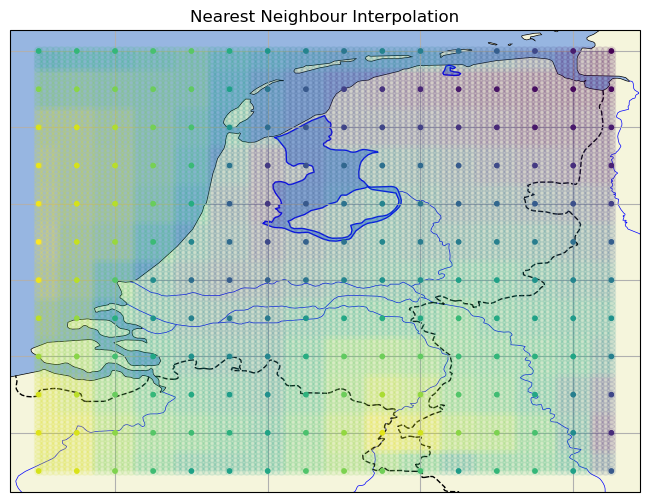

In [7]:
ax = get_cartopy_ax()
ax.scatter(grid_x, grid_y, c = grid_nearest, alpha = 0.1, zorder = 9)
ax.scatter(
    lon_flat,
    lat_flat,
    c=temperatures,
    s=10,
    zorder=10
)
ax.set_title("Nearest Neighbour Interpolation");

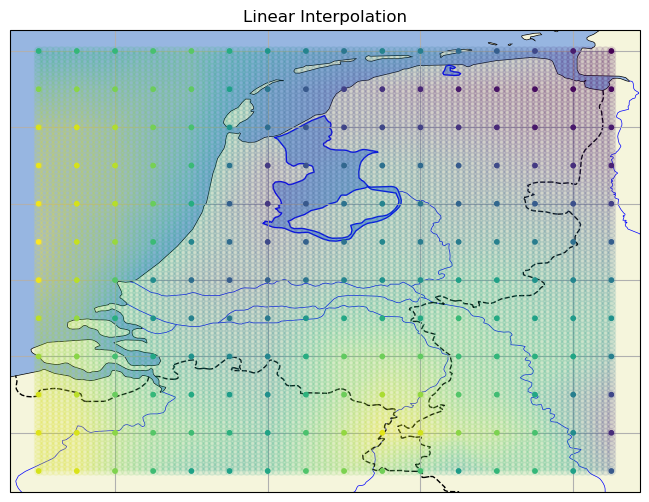

In [8]:
ax = get_cartopy_ax()
ax.scatter(grid_x, grid_y, c = grid_linear, alpha = 0.1, zorder = 9)
ax.scatter(
    lon_flat,
    lat_flat,
    c=temperatures,
    s=10,
    zorder=10
)
ax.set_title("Linear Interpolation");

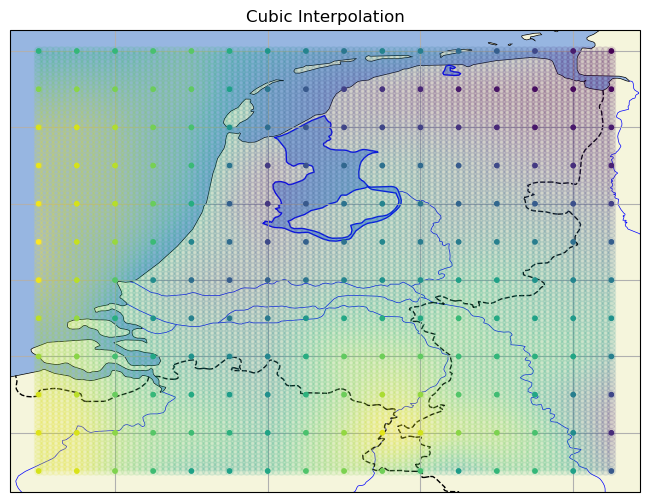

In [9]:
ax = get_cartopy_ax()
ax.scatter(grid_x, grid_y, c = grid_cubic, alpha = 0.1, zorder = 9)
ax.scatter(
    lon_flat,
    lat_flat,
    c=temperatures,
    s=10,
    zorder=10
)
ax.set_title("Cubic Interpolation");

In [10]:
print(era5)

<xarray.Dataset>
Dimensions:                                           (time: 552264,
                                                       latitude: 721,
                                                       longitude: 1440,
                                                       level: 37)
Coordinates:
  * latitude                                          (latitude) float32 90.0...
  * level                                             (level) int64 1 2 ... 1000
  * longitude                                         (longitude) float32 0.0...
  * time                                              (time) datetime64[ns] 1...
Data variables: (12/31)
    10m_u_component_of_wind                           (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind                           (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    2m_temperature                                    (